In [ ]:
## Analyze the data
## Exploratory Data Analysis (EDA)
 

In [98]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [ ]:

FOOTFALL_DATA = "..\weather data\processed_data\final_nyc_weather_2024.csv"
data_df = pd.read_csv(FOOTFALL_DATA)
data_df

,date,temperature_max,temperature_min,precipitation,weather_code,weather_description,season,holiday,mall_footfall,atm_outlet_footfall
0,2024-01-01,4.0,-8.2,9.5,75.0,heavy snow fall,Winter,1,8025.0,5211.0
1,2024-01-02,4.9,0.1,4.9,85.0,Light snow showers,Winter,0,11799.0,4754.0
2,2024-01-03,0.5,-8.3,12.6,45.0,Fog,Winter,0,13181.0,6717.0
3,2024-01-04,4.3,-4.6,14.3,66.0,Light freezing rain,Winter,0,12722.0,6151.0
4,2024-01-05,-0.4,0.1,8.2,75.0,heavy snow fall,Winter,0,13483.0,6459.0
...,...,...,...,...,...,...,...,...,...,...
387,2025-01-22,2.0,-2.6,0.0,48.0,Depositing rime fog,Winter,0,10975.0,5630.0
388,2025-01-23,4.6,0.4,5.0,61.0,Light rain,Rainy,0,10108.0,5132.0
389,2025-01-24,7.4,2.6,2.7,61.0,Light rain,Rainy,0,11244.0,6270.0
390,2025-01-25,13.6,6.6,3.0,61.0,Light rain,Rainy,0,19582.0,8768.0


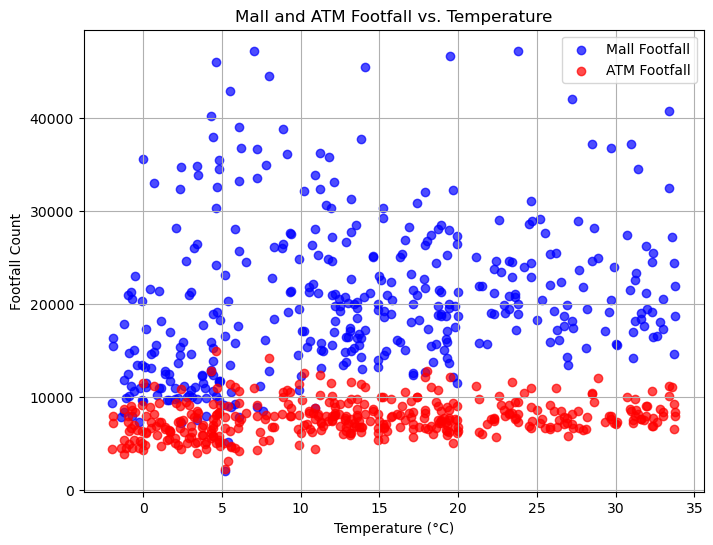

In [100]:
## Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(data_df['temperature_max'], data_df['mall_footfall'], color='blue', alpha=0.7, label='Mall Footfall')
plt.scatter(data_df['temperature_max'], data_df['atm_outlet_footfall'], color='red', alpha=0.7, label='ATM Footfall')
plt.title('Mall and ATM Footfall vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Footfall Count')
plt.grid(True)
plt.legend()
plt.show()

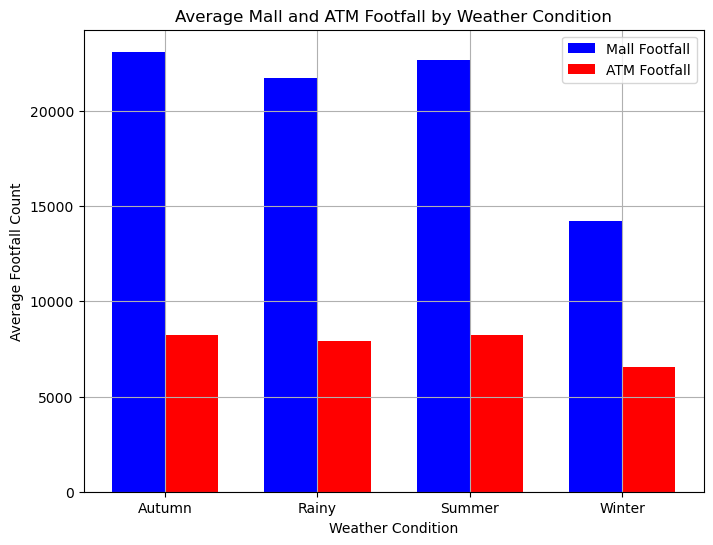

In [101]:
## Bar plot Mall and Atm foot fall analysis

mall_footfall = data_df.groupby('season')['mall_footfall'].mean().reset_index()
atm_footfall = data_df.groupby('season')['atm_outlet_footfall'].mean().reset_index()

combined_footfall = mall_footfall.merge(atm_footfall, on='season')

plt.figure(figsize=(8, 6))
bar_width = 0.35

indices = np.arange(len(combined_footfall['season']))
plt.bar(indices - bar_width/2, combined_footfall['mall_footfall'], width=bar_width, color='blue', label='Mall Footfall')
plt.bar(indices + bar_width/2, combined_footfall['atm_outlet_footfall'], width=bar_width, color='red', label='ATM Footfall')

plt.title('Average Mall and ATM Footfall by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Footfall Count')
plt.xticks(indices, combined_footfall['season'])
plt.grid(True)
plt.legend()
plt.show()

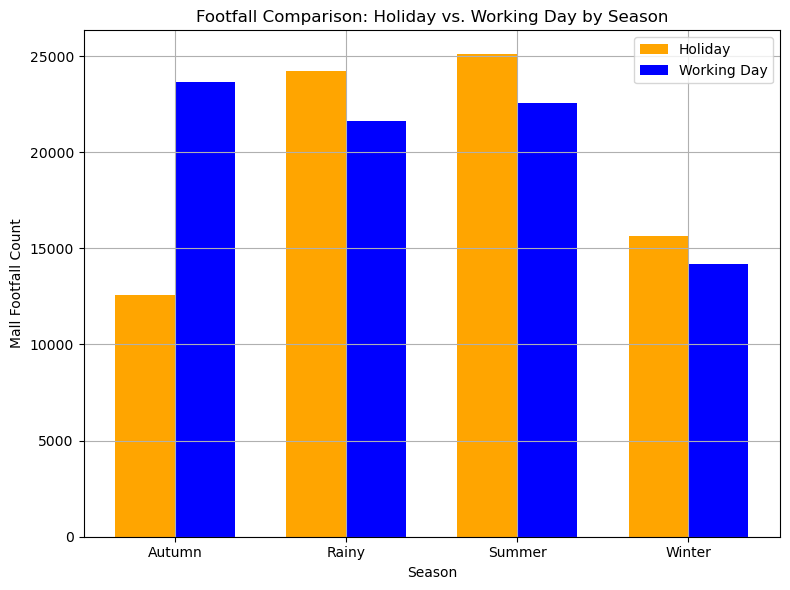

In [102]:
## Mall Fallout
grouped_df = data_df.groupby(['season', 'holiday'])['mall_footfall'].mean().reset_index()
pivot_df = grouped_df.pivot(index='season', columns='holiday', values='mall_footfall')

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(pivot_df))

bar1 = ax.bar(index, pivot_df[1], bar_width, label='Holiday', color='orange')
bar2 = ax.bar(index + bar_width, pivot_df[0], bar_width, label='Working Day', color='blue')

ax.set_xlabel('Season')
ax.set_ylabel('Mall Footfall Count')
ax.set_title('Footfall Comparison: Holiday vs. Working Day by Season')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

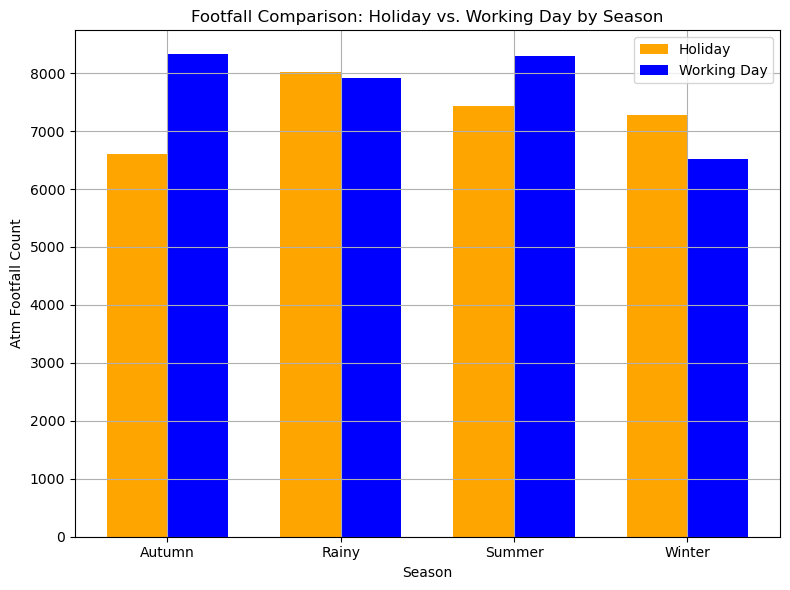

In [103]:
## Atm Fallout
grouped_df = data_df.groupby(['season', 'holiday'])['atm_outlet_footfall'].mean().reset_index()
pivot_df = grouped_df.pivot(index='season', columns='holiday', values='atm_outlet_footfall')

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(pivot_df))

bar1 = ax.bar(index, pivot_df[1], bar_width, label='Holiday', color='orange')
bar2 = ax.bar(index + bar_width, pivot_df[0], bar_width, label='Working Day', color='blue')

ax.set_xlabel('Season')
ax.set_ylabel('Atm Footfall Count')
ax.set_title('Footfall Comparison: Holiday vs. Working Day by Season')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
# Compute Pearson and Spearman correlations

# Encode season variable
season_mapping = {'Winter': 1, 'Rainy': 2, 'Summer': 3, 'Autumn': 4}
data_df['season_encoded'] = data_df['season'].map(season_mapping)

mall_pearson_corr = data_df[["mall_footfall", "season_encoded"]].corr(method="pearson")
mall_spearman_corr = data_df[["mall_footfall", "season_encoded"]].corr(method="spearman")

atm_pearson_corr = data_df[["atm_outlet_footfall", "season_encoded"]].corr(method="pearson")
atm_spearman_corr = data_df[["atm_outlet_footfall", "season_encoded"]].corr(method="spearman")

# Print results
print("Mall Fallout Pearson Correlation:\n", mall_pearson_corr)
print("\n Mall Fallout Spearman Correlation:\n", mall_spearman_corr)
print("\n Atm Fallout Pearson Correlation:\n", atm_pearson_corr)
print("\n Atm Fallout Spearman Correlation:\n", atm_spearman_corr)


Mall Fallout Pearson Correlation:
                 mall_footfall  season_encoded
mall_footfall        1.000000        0.361718
season_encoded       0.361718        1.000000

 Mall Fallout Spearman Correlation:
                 mall_footfall  season_encoded
mall_footfall        1.000000        0.417829
season_encoded       0.417829        1.000000

 Atm Fallout Pearson Correlation:
                      atm_outlet_footfall  season_encoded
atm_outlet_footfall              1.00000         0.31165
season_encoded                   0.31165         1.00000

 Atm Fallout Spearman Correlation:
                      atm_outlet_footfall  season_encoded
atm_outlet_footfall             1.000000        0.335711
season_encoded                  0.335711        1.000000


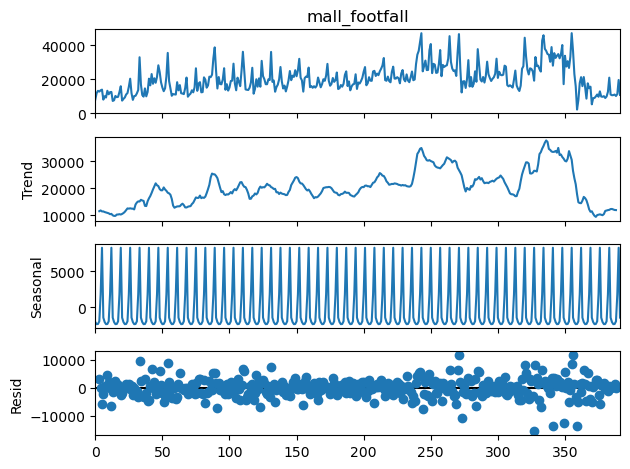

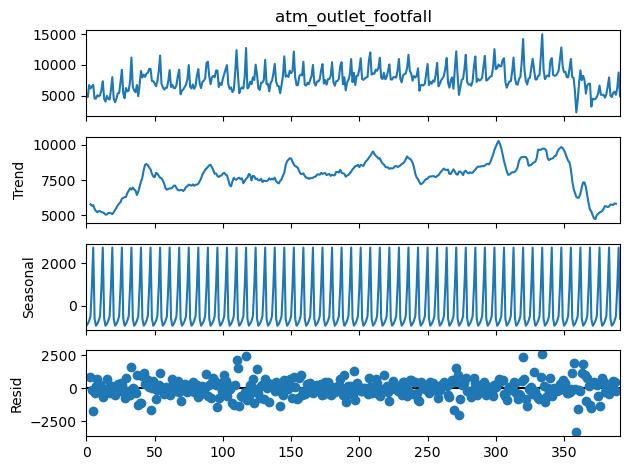

In [105]:
## Time-Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose


# Perform decomposition
mall_result = seasonal_decompose(data_df['mall_footfall'], model='additive', period=7)  
atm_result = seasonal_decompose(data_df['atm_outlet_footfall'], model='additive', period=7) 

# Plot the components
mall_result.plot()
atm_result.plot()
plt.show()

In [106]:
from scipy.stats import zscore

data_df['mall_footfall_zscore'] = zscore(data_df['mall_footfall'])
mall_outliers = data_df[(data_df['mall_footfall_zscore'] > 3) | (data_df['mall_footfall_zscore'] < -3)]


data_df['atm_footfall_zscore'] = zscore(data_df['atm_outlet_footfall'])
atm_outliers = data_df[(data_df['atm_outlet_footfall'] > 3) | (data_df['atm_outlet_footfall'] < -3)]

In [107]:
mall_outliers

,date,temperature_max,temperature_min,precipitation,weather_code,weather_description,season,holiday,mall_footfall,atm_outlet_footfall,season_encoded,mall_footfall_zscore
243,2024-08-31,23.8,14.7,6.5,2.0,Partly cloudy,Summer,0,47217.0,9441.0,3,3.299526
264,2024-09-21,14.1,11.4,5.3,51.0,Light drizzle,Autumn,0,45485.0,11125.0,4,3.086288
271,2024-09-28,19.5,11.0,3.6,45.0,Fog,Autumn,0,46687.0,12223.0,4,3.234274
334,2024-11-30,4.6,-0.8,0.0,3.0,Overcast,Autumn,0,46034.0,15019.0,4,3.153879
355,2024-12-21,7.0,2.5,3.0,61.0,Light rain,Rainy,0,47251.0,10969.0,2,3.303712


In [108]:
atm_outliers

,date,temperature_max,temperature_min,precipitation,weather_code,weather_description,season,holiday,mall_footfall,atm_outlet_footfall,season_encoded,mall_footfall_zscore,atm_footfall_zscore
0,2024-01-01,4.0,-8.2,9.5,75.0,heavy snow fall,Winter,1,8025.0,5211.0,1,-1.525678,-1.358030
1,2024-01-02,4.9,0.1,4.9,85.0,Light snow showers,Winter,0,11799.0,4754.0,1,-1.061034,-1.604701
2,2024-01-03,0.5,-8.3,12.6,45.0,Fog,Winter,0,13181.0,6717.0,1,-0.890886,-0.545146
3,2024-01-04,4.3,-4.6,14.3,66.0,Light freezing rain,Winter,0,12722.0,6151.0,1,-0.947397,-0.850652
4,2024-01-05,-0.4,0.1,8.2,75.0,heavy snow fall,Winter,0,13483.0,6459.0,1,-0.853705,-0.684405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2025-01-22,2.0,-2.6,0.0,48.0,Depositing rime fog,Winter,0,10975.0,5630.0,1,-1.162482,-1.131869
388,2025-01-23,4.6,0.4,5.0,61.0,Light rain,Rainy,0,10108.0,5132.0,2,-1.269225,-1.400671
389,2025-01-24,7.4,2.6,2.7,61.0,Light rain,Rainy,0,11244.0,6270.0,2,-1.129364,-0.786420
390,2025-01-25,13.6,6.6,3.0,61.0,Light rain,Rainy,0,19582.0,8768.0,2,-0.102814,0.561909


In [109]:
df = data_df.copy()

In [110]:

df["mall_z_score"] = zscore(df["mall_footfall"])
df["mall_fallout_is_outlier"] = df["mall_z_score"].abs() > 2 

df["atm_z_score"] = zscore(df["atm_outlet_footfall"])
df["atm_fallout_is_outlier"] = df["atm_z_score"].abs() > 2 


In [111]:
df

,date,temperature_max,temperature_min,precipitation,weather_code,weather_description,season,holiday,mall_footfall,atm_outlet_footfall,season_encoded,mall_footfall_zscore,atm_footfall_zscore,mall_z_score,mall_fallout_is_outlier,atm_z_score,atm_fallout_is_outlier
0,2024-01-01,4.0,-8.2,9.5,75.0,heavy snow fall,Winter,1,8025.0,5211.0,1,-1.525678,-1.358030,-1.525678,False,-1.358030,False
1,2024-01-02,4.9,0.1,4.9,85.0,Light snow showers,Winter,0,11799.0,4754.0,1,-1.061034,-1.604701,-1.061034,False,-1.604701,False
2,2024-01-03,0.5,-8.3,12.6,45.0,Fog,Winter,0,13181.0,6717.0,1,-0.890886,-0.545146,-0.890886,False,-0.545146,False
3,2024-01-04,4.3,-4.6,14.3,66.0,Light freezing rain,Winter,0,12722.0,6151.0,1,-0.947397,-0.850652,-0.947397,False,-0.850652,False
4,2024-01-05,-0.4,0.1,8.2,75.0,heavy snow fall,Winter,0,13483.0,6459.0,1,-0.853705,-0.684405,-0.853705,False,-0.684405,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2025-01-22,2.0,-2.6,0.0,48.0,Depositing rime fog,Winter,0,10975.0,5630.0,1,-1.162482,-1.131869,-1.162482,False,-1.131869,False
388,2025-01-23,4.6,0.4,5.0,61.0,Light rain,Rainy,0,10108.0,5132.0,2,-1.269225,-1.400671,-1.269225,False,-1.400671,False
389,2025-01-24,7.4,2.6,2.7,61.0,Light rain,Rainy,0,11244.0,6270.0,2,-1.129364,-0.786420,-1.129364,False,-0.786420,False
390,2025-01-25,13.6,6.6,3.0,61.0,Light rain,Rainy,0,19582.0,8768.0,2,-0.102814,0.561909,-0.102814,False,0.561909,False


In [112]:
 # Display outliers
outliers = df[df["mall_fallout_is_outlier"]]
print(outliers[["mall_footfall", "mall_z_score", "mall_fallout_is_outlier"]])


     mall_footfall  mall_z_score  mall_fallout_is_outlier
89         38846.0      2.268913                     True
241        36753.0      2.011229                     True
242        42114.0      2.671260                     True
243        47217.0      3.299526                     True
249        37200.0      2.066263                     True
250        40816.0      2.511454                     True
257        37273.0      2.075250                     True
264        45485.0      3.086288                     True
271        46687.0      3.234274                     True
285        37807.0      2.140995                     True
320        44552.0      2.971419                     True
333        42868.0      2.764090                     True
334        46034.0      3.153879                     True
335        37996.0      2.164264                     True
336        36795.0      2.016400                     True
340        39023.0      2.290705                     True
348        402

In [113]:
outliers = df[df["atm_fallout_is_outlier"]]
print(outliers[["atm_outlet_footfall", "atm_z_score", "atm_fallout_is_outlier"]])

     atm_outlet_footfall  atm_z_score  atm_fallout_is_outlier
14                3997.0    -2.013302                    True
21                3896.0    -2.067818                    True
54               11543.0     2.059752                    True
110              12417.0     2.531505                    True
117              12775.0     2.724741                    True
152              12185.0     2.406280                    True
208              12039.0     2.327475                    True
236              11662.0     2.123984                    True
271              12223.0     2.426791                    True
278              11651.0     2.118047                    True
292              11483.0     2.027366                    True
299              12583.0     2.621106                    True
320              14233.0     3.511716                    True
334              15019.0     3.935970                    True
348              12862.0     2.771700                    True
359     

In [114]:
df.to_csv("./processed_data/final_eda_nyc_weather_2024.csv", index=False)